## Imports

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('classic')

## Inlezen en samenvoegen

In [2]:
data19732014Path = 'C:/Users/rwdev/Opdracht_Roel_en_Jur/data/NEIC_global_1973-2014.TXT'
data20152017Path = 'C:/Users/rwdev/Opdracht_Roel_en_Jur/data/query2015_2017.csv'
data19732014 = pd.read_csv(
                        data19732014Path, delimiter='\t', header=0,
                        index_col=1, decimal=',', 
                        parse_dates={'time':['Year','Month','Day']},
                        usecols=[0,1,2,3,5,6,7,8])
                          
data20152017 = pd.read_csv(
                        data20152017Path, 
                        usecols=['time', 'latitude', 'longitude', 'depth', 'mag'],
                        parse_dates=['time']) 

In [3]:
data19732014.rename(columns={'time':'time', 'Latit':'latitude', 'Longit':'longitude', 
                             'Depth':'depth', 'Magnitude':'mag'}, inplace=True)
data = pd.concat([data19732014, data20152017], ignore_index=True)

In [75]:
data.describe()

latitude      longitude          depth            mag
count  225047.000000  225047.000000  225047.000000  225047.000000
mean        4.504329      44.976216      73.841594       4.891464
std        28.934276     120.470226     118.188336       0.411592
min       -84.130000    -180.000000       0.000000       4.500000
25%       -16.800000     -71.062750      16.000000       4.600000
50%         0.714900     102.990000      33.000000       4.800000
75%        29.140000     142.740000      65.900000       5.100000
max        87.220000     180.000000     700.000000       9.100000

## Is het aantal aardbevingen (per maand of per jaar) rond Haiti flink toegenomen sinds 2010?

C:\Users\rwdev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


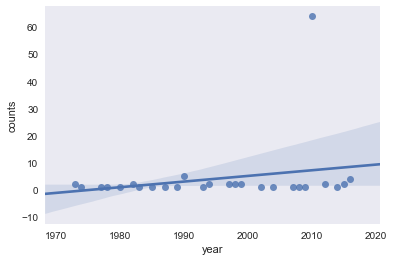

In [161]:
haiti = data.loc[data.latitude.between(16.791, 21.235) & data.longitude.between(-75, -71)]
haiti['year'] = haiti.time.dt.year

yearly = haiti.year.value_counts().reset_index()
yearly.rename(columns={'index':'year', 'year':'counts'}, inplace=True)
#yearly.sort_values('year').plot('year', 'counts', kind='line', legend=False, figsize=(20,10))
#plt.ylabel('counts')
yearly.sort_values('year', inplace=True)
sns.regplot(yearly.year,yearly.counts, data=yearly, fit_reg=True)

In [134]:
help(sns.tsplot)

Help on function tsplot in module seaborn.timeseries:

tsplot(data, time=None, unit=None, condition=None, value=None, err_style='ci_band', ci=68, interpolate=True, color=None, estimator=<function mean at 0x000002799C91AD90>, n_boot=5000, err_palette=None, err_kws=None, legend=True, ax=None, **kwargs)
    Plot one or more timeseries with flexible representation of uncertainty.
    
    This function is intended to be used with data where observations are
    nested within sampling units that were measured at multiple timepoints.
    
    It can take data specified either as a long-form (tidy) DataFrame or as an
    ndarray with dimensions (unit, time) The interpretation of some of the
    other parameters changes depending on the type of object passed as data.
    
    Parameters
    ----------
    data : DataFrame or ndarray
        Data for the plot. Should either be a "long form" dataframe or an
        array with dimensions (unit, time, condition). In both cases, the
        conditi

## En rond Kathmandu (Nepal) sinds 2015?

C:\Users\rwdev\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rwdev\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\rwdev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

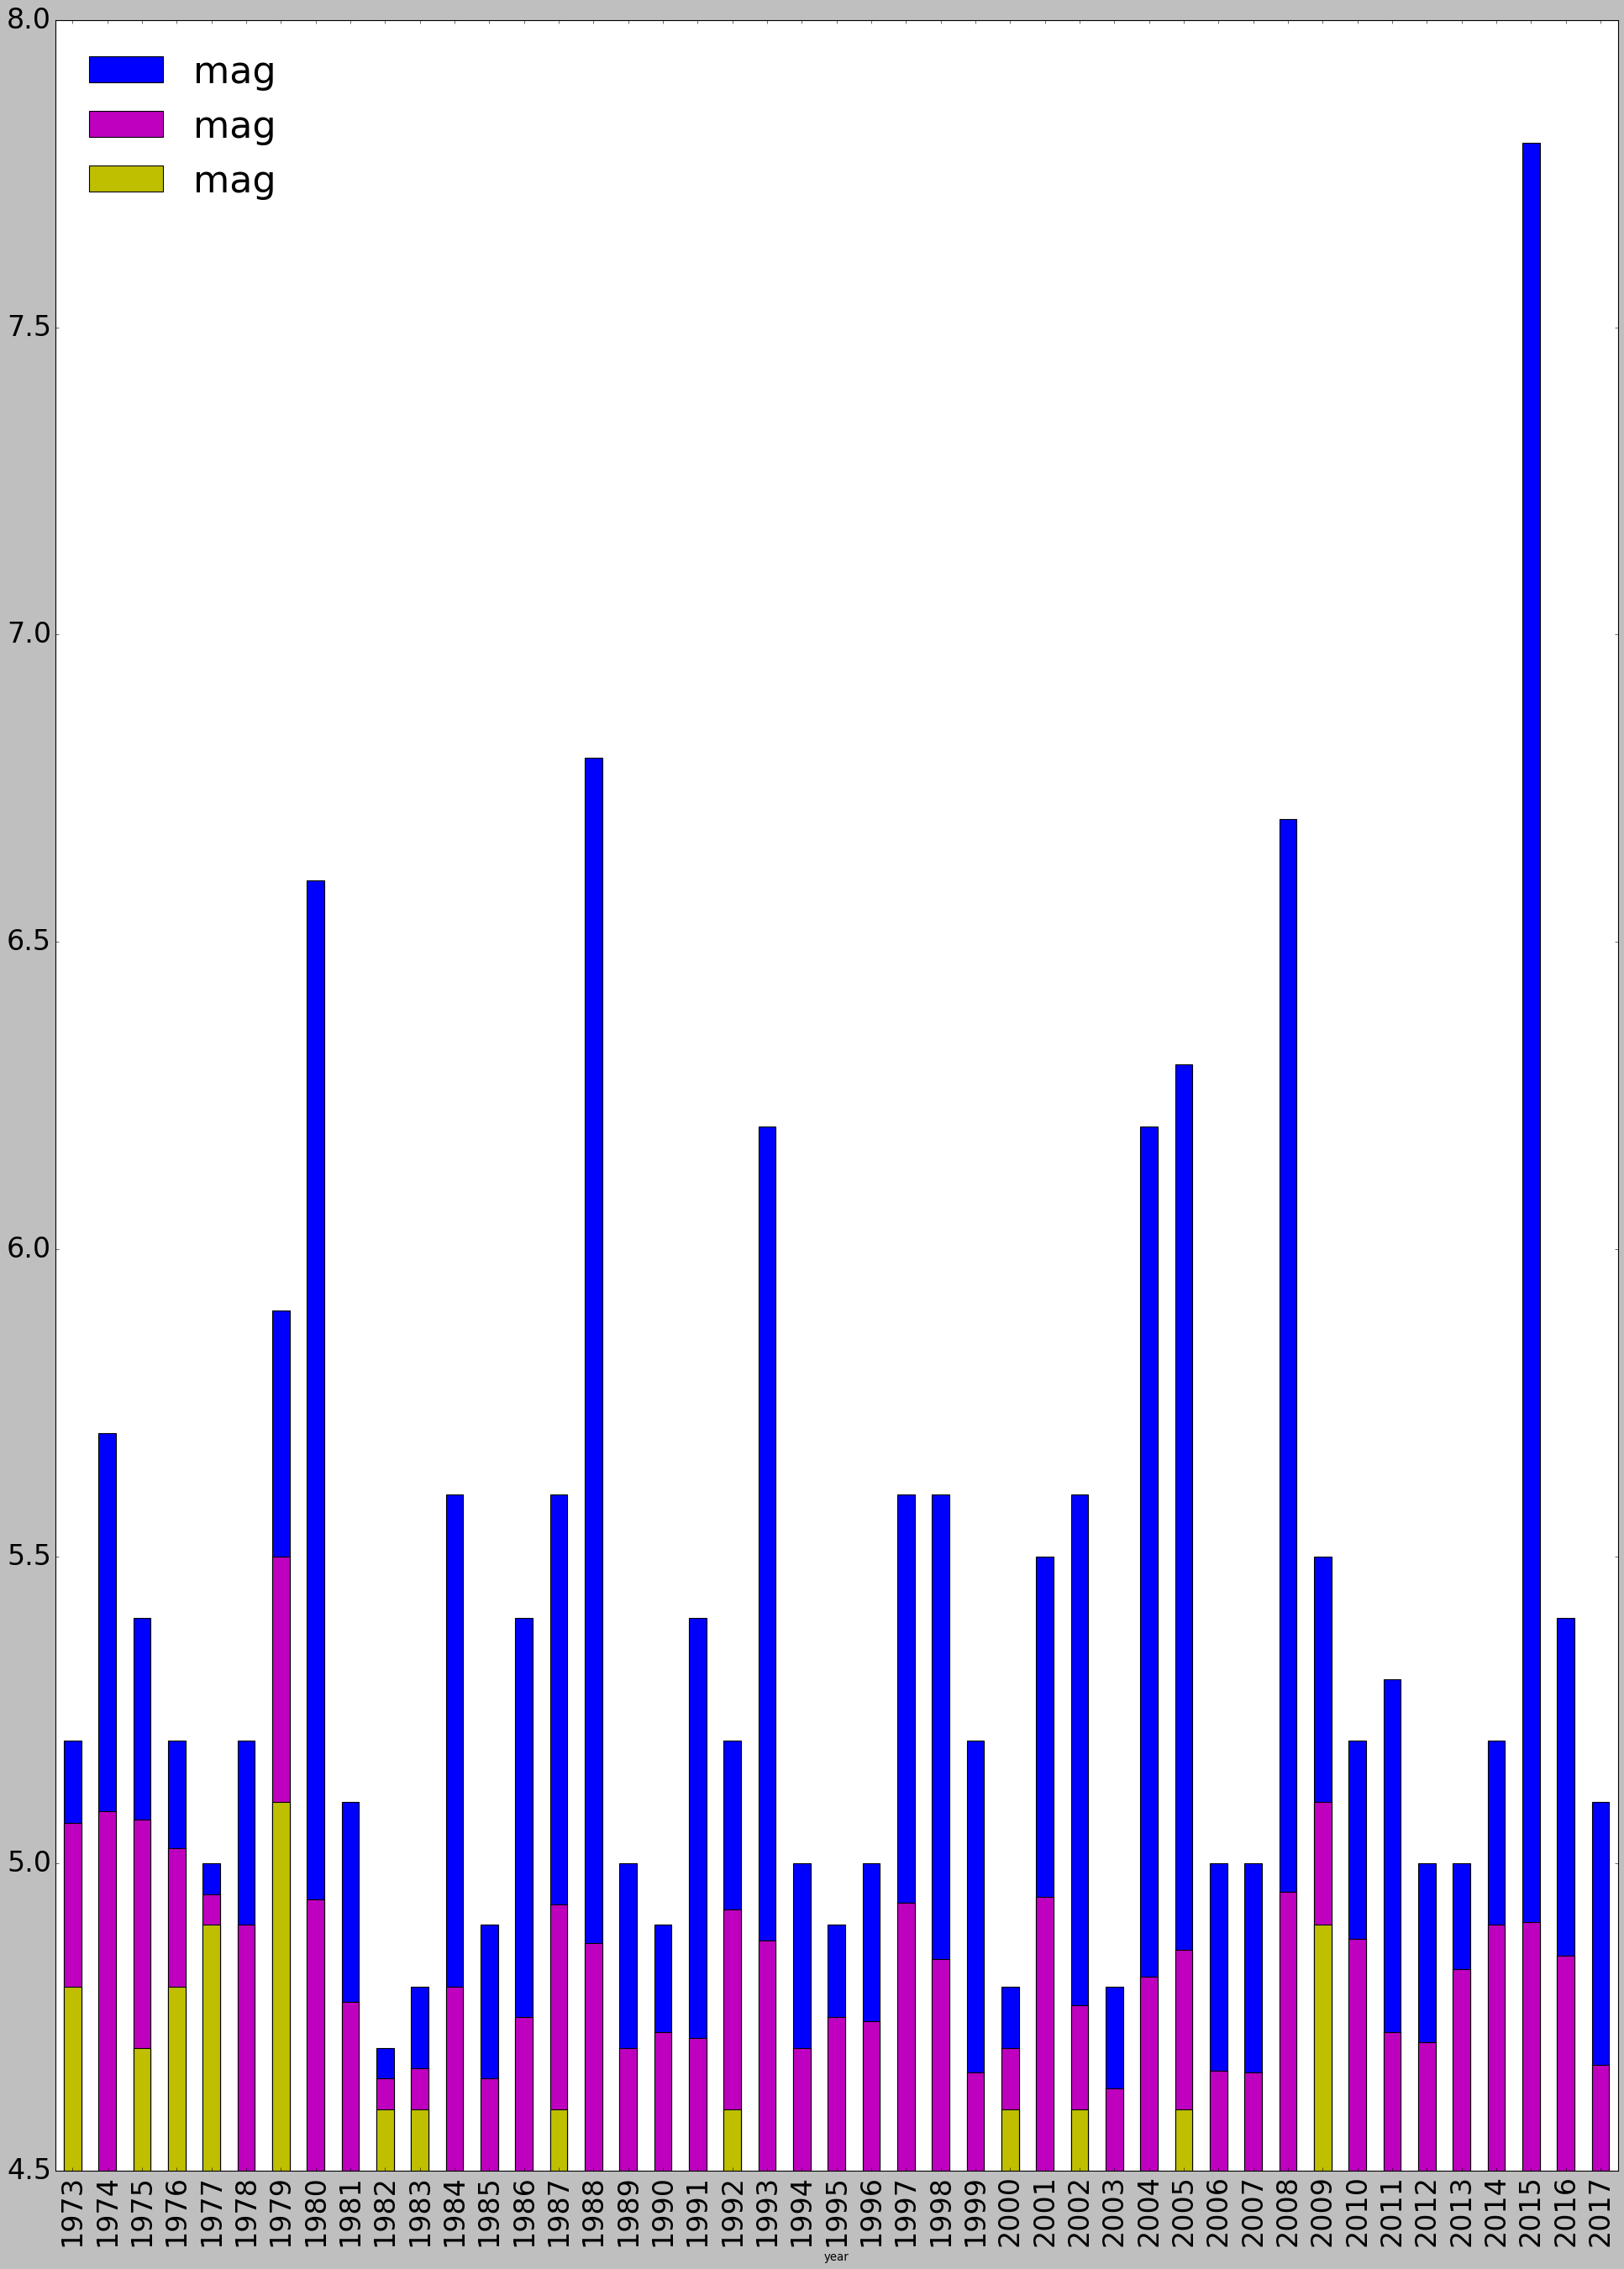

In [223]:
nepal = data.loc[data.latitude.between(26,31) & data.longitude.between(80,88)]
nepal.loc[:,'year'] = nepal.loc[:,'time'].dt.year
#yearly_n = nepal.year.reset_index()
#yearly_n.rename(columns={'index':'year', 'year':'counts'}, inplace=True)
#yearly_n.sort_values('year', inplace=True)
#sns.regplot(yearly_n.year,yearly_n.counts, data=yearly_n, fit_reg=True)
nepal.sort_values('year', inplace=True)
#sns.regplot('year', 'mag', data=nepal, fit_reg=True, )
#nepal.plot('year', 'mag', figsize=(20,10), kind='bar')      


fig, ax = plt.subplots(figsize=(30,40))
#nepal[['year', 'mag']].groupby('year').count().plot(ax=ax[0,0], fontsize=40)
nepal[['year', 'mag']].groupby('year').max().plot(label='Max', ax=ax, fontsize=30, color='b', 
                                                  kind='bar', stacked=True)
nepal[['year', 'mag']].groupby('year').mean().plot(ax=ax, fontsize=30, color='m',
                                                   kind='bar', stacked=True, label='Mean')
nepal[['year', 'mag']].groupby('year').min().plot(ax=ax, fontsize=30, color='y',
                                                kind='bar', stacked=True, label='Min')

plt.ylim(ymin=4.5)
ax.legend(loc=2, fontsize=40, frameon=False)
#plt.yticks('log')
#ax[0,0].set_title('aantal aardebevingen per jaar\n', fontsize=40, weight='bold')
#ax[1,0].set_title('maximale magnitude per jaar\n', fontsize=40, weight='bold')
#ax[0,1].set_title('gemiddelde magnitude per jaar\n', fontsize=40, weight='bold')
#ax[1,1].set_title('minimale magnitude\n', fontsize=40, weight='bold')
plt.show()


## Waar komen over het algemeen de meeste aardbevingen voor, op het noordelijk of het zuidelijk halfrond?

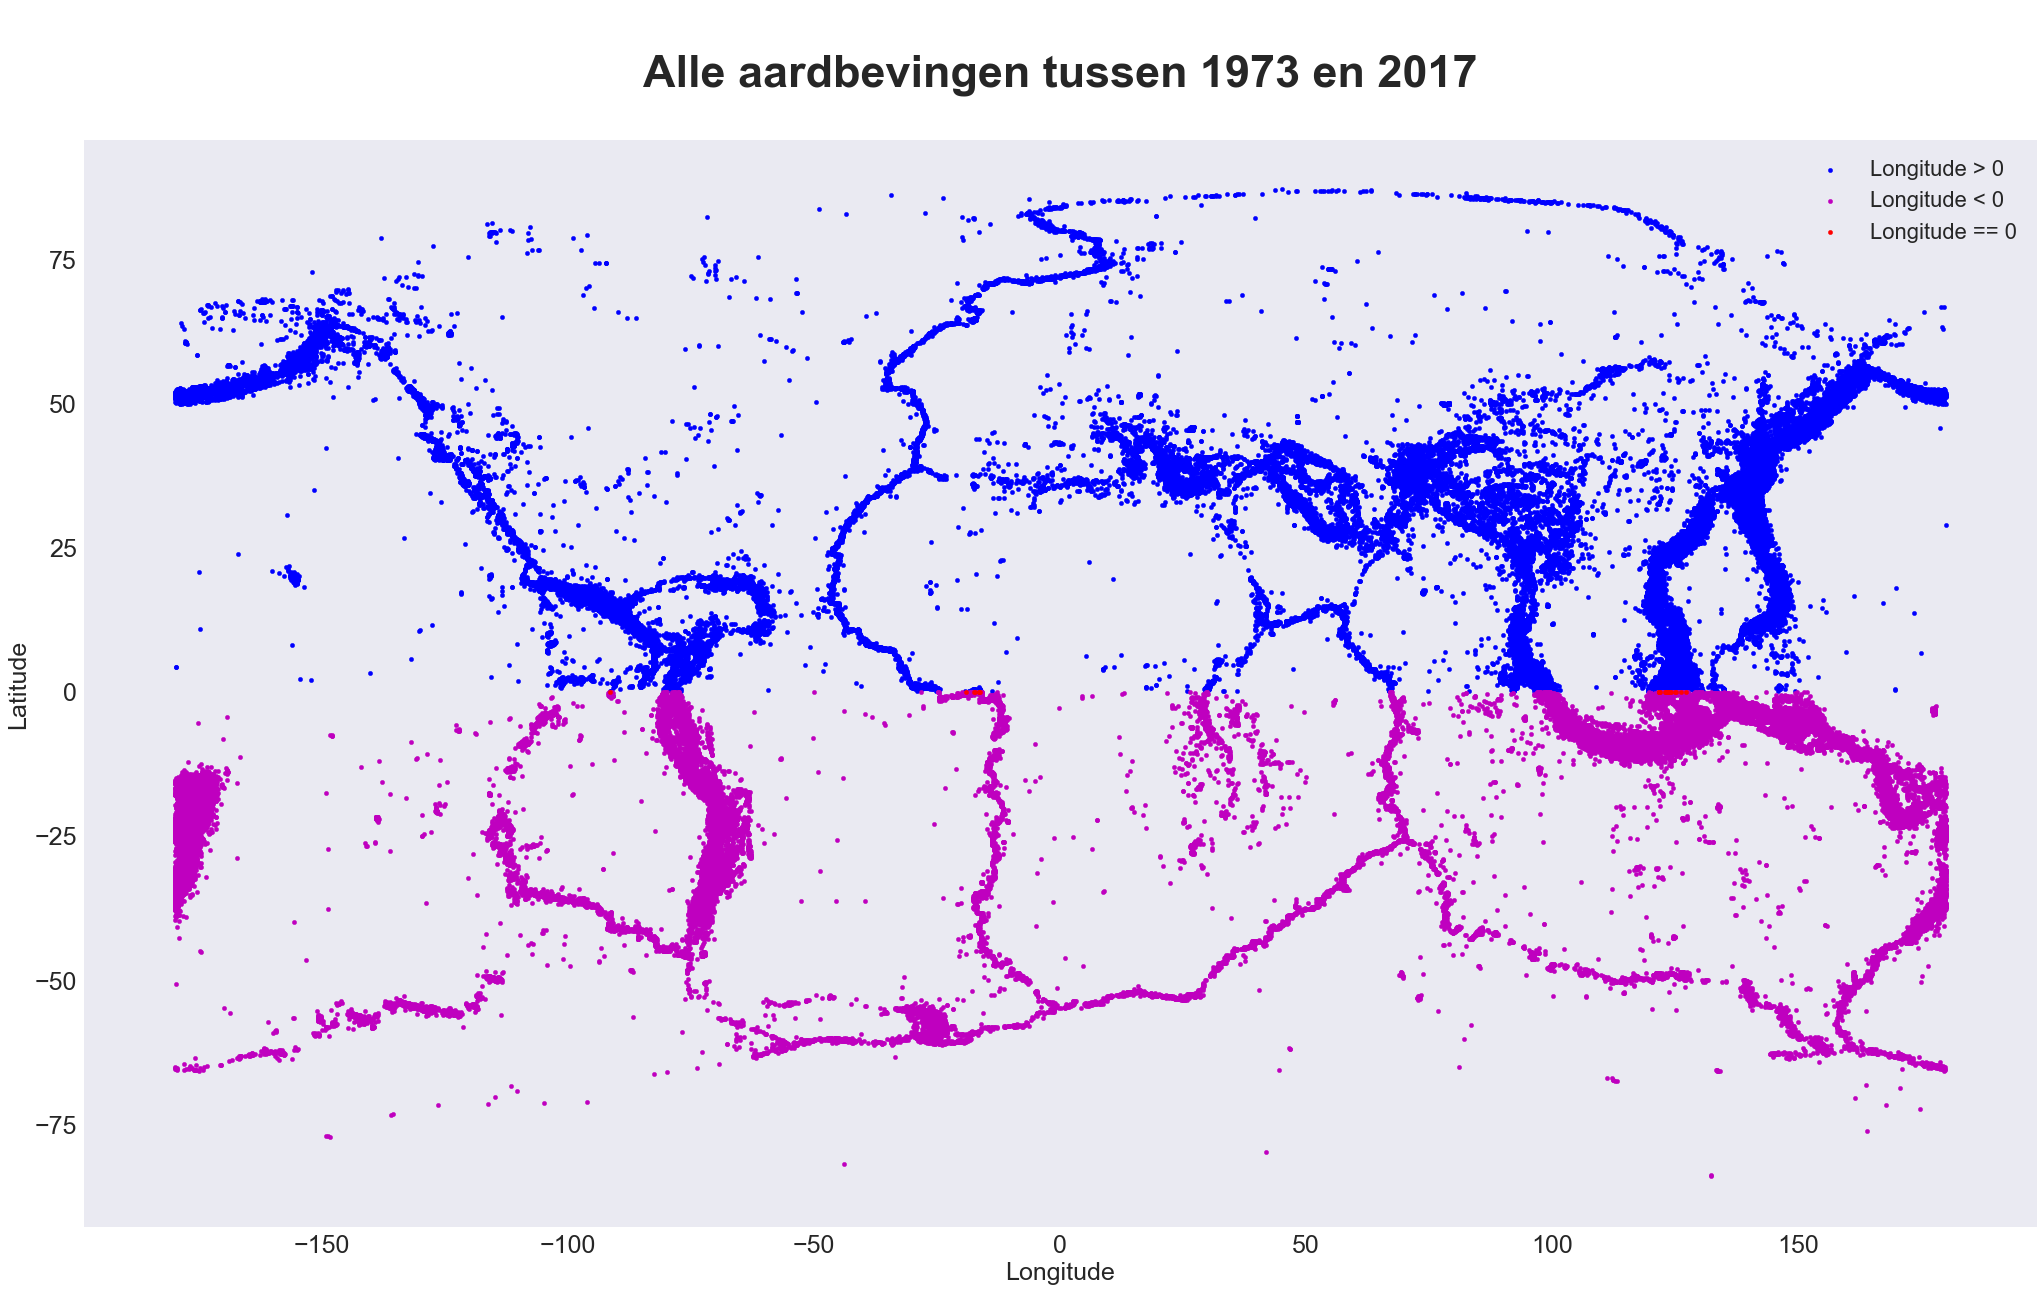

In [165]:
zh = data.loc[data.latitude < 0]
nh = data.loc[data.latitude > 0]
evenaar = data.loc[data.latitude == 0]


fig, ax = plt.subplots(figsize=(35,20))

nh.plot('longitude', 'latitude', kind='scatter', color='blue', ax=ax, fontsize=25, label='Longitude > 0')
zh.plot('longitude', 'latitude', kind='scatter', color='m', ax=ax, label='Longitude < 0')
evenaar.plot('longitude', 'latitude', kind='scatter', color='r', ax=ax, label='Longitude == 0')

plt.ylabel('Latitude', fontsize=25)
plt.xlabel('Longitude', fontsize=25)
plt.title('\nAlle aardbevingen tussen 1973 en 2017\n', fontsize=45, weight='bold')
plt.legend(loc=1, fontsize = 22)

plt.show()

## Op welke diepte komen de meeste aardbevingen voor?

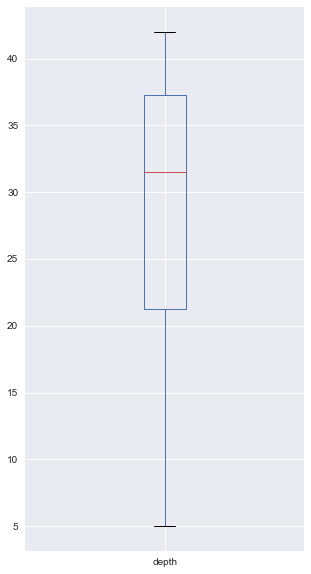

In [164]:
depth_data = data[['depth', 'mag']].groupby('depth').count().rename(columns={'mag': 'Counts'}).nlargest(10, 'Counts').reset_index()
depth_data.plot('Counts',kind='box', figsize=(5,10), grid=True)


##  Kun je een verband ontdekken tussen diepte en magnitude?

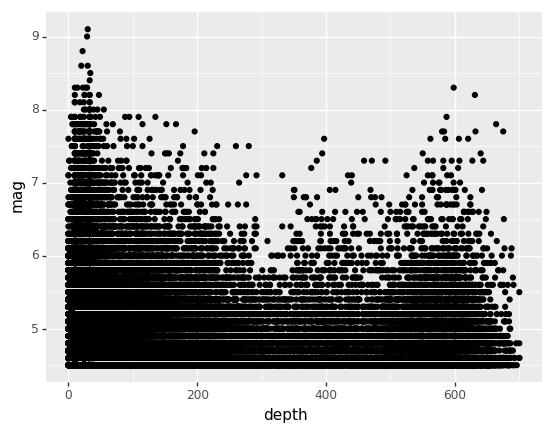

<ggplot: (-9223371866755426353)>

In [108]:
#print(data[['Depth', 'Magnitude']].corr())
#data.plot('Depth', 'Magnitude', kind='scatter', figsize=(10,10))

(ggplot(data, aes(x='depth', y='mag'))
 + geom_point() 
)

TypeError: 'builtin_function_or_method' object is not iterable

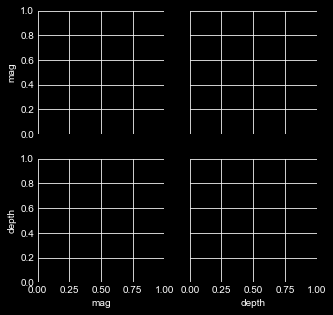

In [114]:
sns.PairGrid(data='data', vars={'depth', 'mag'})

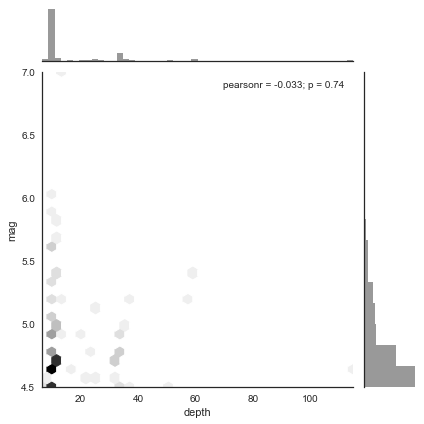

In [163]:
with sns.axes_style("white"):
    sns.jointplot(x='depth', y='mag', data=haiti, kind="hex", color="k");

In [43]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']
